In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

base_path = './'

Mounted at /content/drive


In [ ]:
load_path = os.path.join(base_path, 'results/UBEM_Result_Final.csv')
final_df = pd.read_csv(load_path)
final_df

>> Original Buildings : 1,233,505
>> Valid Buildings : 1,226,227 (R2 > 0)
--------------------------------------------------


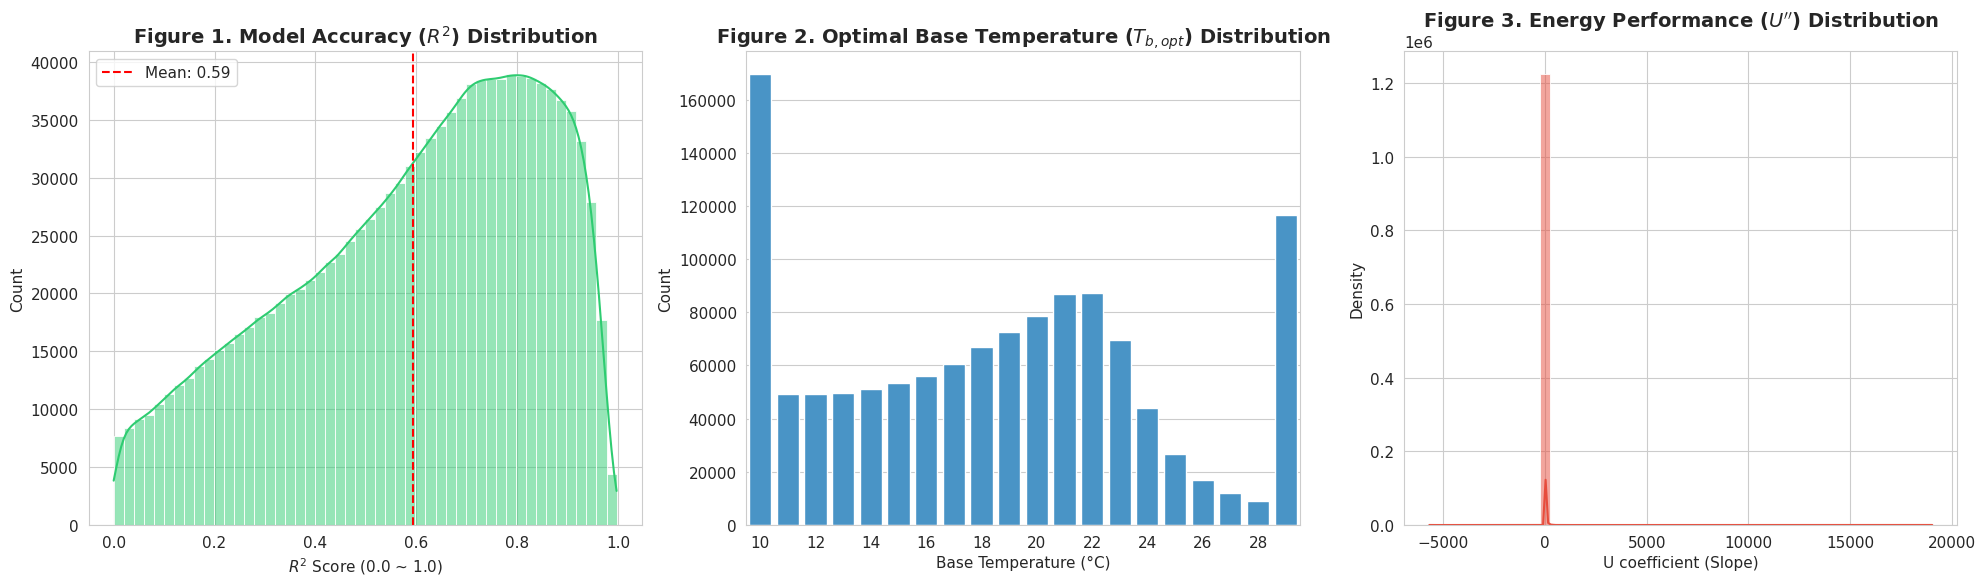


[IDH Modeling First Report]
1. Success Rate : 99.4% (Valid Buildings / Every Building)
2. Model Accuracy Average : 0.5934 (R2 Score)
3. Highly Trusted Buildings : 497,684개 (40.6% is R2 >= 0.7)
------------------------------------------------------------
4. The Most Frequent IDH : 10°C
5. Average IDH : 18.38°C
------------------------------------------------------------
6. Average Thermal Insulation Performance (U) : 1.32


In [ ]:
# ==========================================
# First Filtering : picking out the error
# ==========================================
# Only R2 > 0
valid_df = final_df[final_df['R2'] > 0.0].copy()

print(f">> Original Buildings : {len(final_df):,}")
print(f">> Valid Buildings : {len(valid_df):,} (R2 > 0)")
print("-" * 50)

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (20, 6)
plt.rcParams['font.size'] = 11

fig, axes = plt.subplots(1, 3)

# --- [Figure 1] Model Accuracy (R2 Score) ---
sns.histplot(data=valid_df, x='R2', bins=50, kde=True, color='#2ecc71', ax=axes[0])
axes[0].set_title('Model Accuracy ($R^2$) Distribution', fontsize=14, fontweight='bold')
axes[0].set_xlabel('$R^2$ Score (0.0 ~ 1.0)')
axes[0].set_ylabel('Count')
axes[0].axvline(valid_df['R2'].mean(), color='red', linestyle='--', label=f"Mean: {valid_df['R2'].mean():.2f}")
axes[0].legend()

# --- [Figure 2] Optimal Base Temp (IDH) ---
sns.countplot(data=valid_df, x='Tb_opt', color='#3498db', ax=axes[1])
axes[1].set_title('Optimal Base Temperature ($T_{b,opt}$) Distribution', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Base Temperature (°C)')
axes[1].set_ylabel('Count')

for i, label in enumerate(axes[1].get_xticklabels()):
    if i % 2 != 0: label.set_visible(False)

# --- [Figure 3] Thermal Insulate Performance (U coefficient) ---
u_limit_h = valid_df['U_coeff'].quantile(0.98)
u_limit_l = valid_df['U_coeff'].quantile(0.02)

filtered_u = valid_df['U_coeff']

sns.histplot(x=filtered_u, bins=50, kde=True, color='#e74c3c', ax=axes[2])
axes[2].set_title(r'Energy Performance ($U^{\prime\prime}$) Distribution', fontsize=14, fontweight='bold')
axes[2].set_xlabel('U coefficient (Slope)')
axes[2].set_ylabel('Density')

plt.tight_layout()
plt.show()


# --- Summary ---
r2_high = len(valid_df[valid_df['R2'] >= 0.7])
tb_mode = valid_df['Tb_opt'].mode()[0]

print("\n" + "="*60)
print("[IDH Modeling First Report]")
print("="*60)
print(f"1. Success Rate : {len(valid_df)/len(final_df)*100:.1f}% (Valid Buildings / Every Building)")
print(f"2. Model Accuracy Average : {valid_df['R2'].mean():.4f} (R2 Score)")
print(f"3. Highly Trusted Buildings : {r2_high:,} ({r2_high/len(valid_df)*100:.1f}% is R2 >= 0.7)")
print("-" * 60)
print(f"4. The Most Frequent IDH : {tb_mode}°C")
print(f"5. Average IDH : {valid_df['Tb_opt'].mean():.2f}°C")
print("-" * 60)
print(f"6. Average Thermal Insulation Performance (U) : {valid_df['U_coeff'].mean():.2f}")
print("="*60)

>> First Valid Buildings : 1,226,227
>> Second Valid Buildings : 845,952
--------------------------------------------------


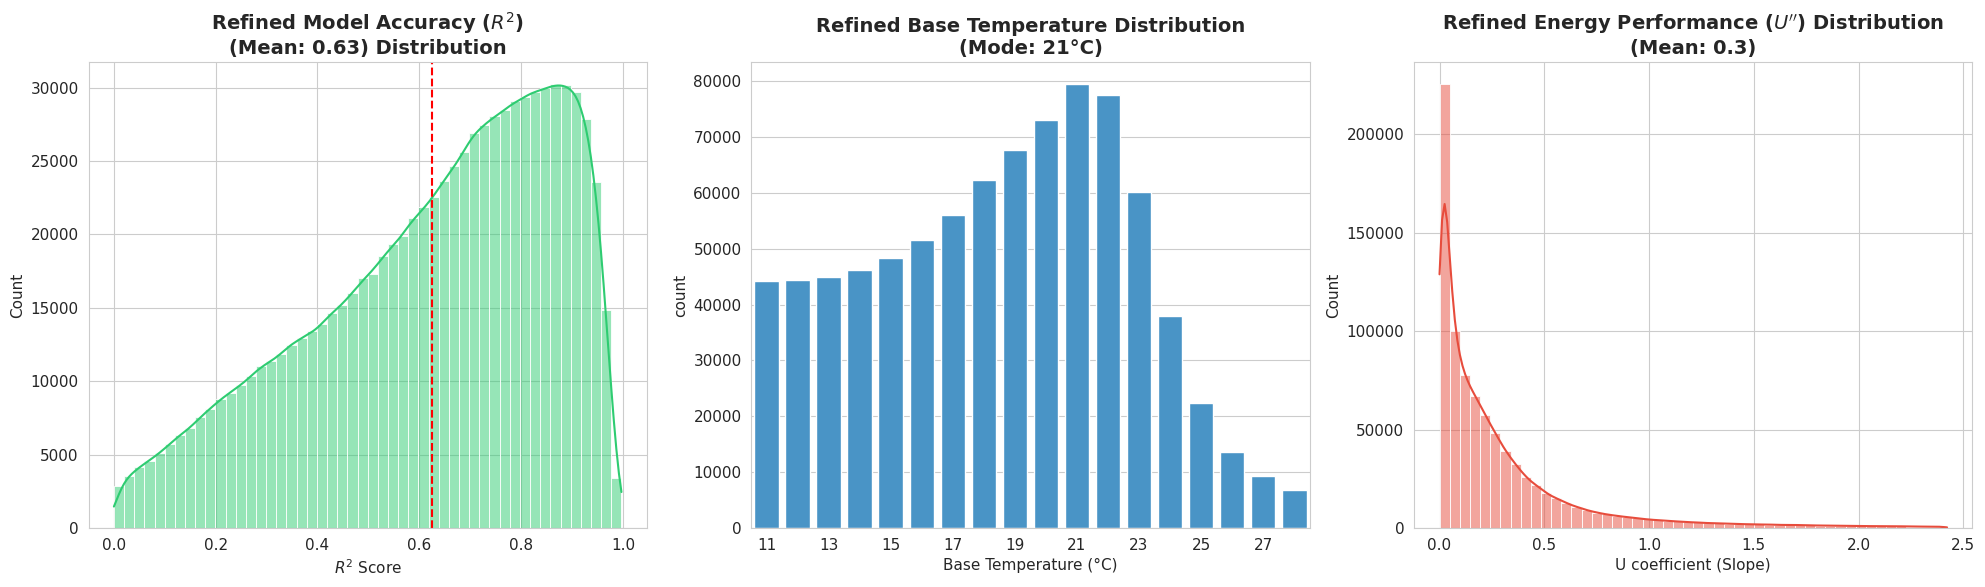


[IDH Modeling Second Report]
1. Success Rate : 69.0% (2nd Valid Buildings / 1st Valid Buildings)
2. Refined Model Accuracy Average : 0.6254 (R2 Score)
3. Highly Trusted Buildings : 385,920개 (45.6% is R2 >= 0.7)
------------------------------------------------------------
4. The Most Frequent IDH : 21°C
5. Average IDH : 18.50°C
------------------------------------------------------------
6. Average Thermal Insulation Performance (U) : 0.29


In [ ]:
# ==========================================
# Second Filtering : picking out the outlier
# ==========================================
# Only 10 < IDH < 29 (Boundary Effect X)
refined_df = valid_df[(valid_df['Tb_opt'] > 10) & (valid_df['Tb_opt'] < 29)].copy()

# Only U > 0 and not too big
u_upper_limit = refined_df['U_coeff'].quantile(0.95)
refined_df = refined_df[(refined_df['U_coeff'] > 0) & (refined_df['U_coeff'] < u_upper_limit)]

print(f">> First Valid Buildings : {len(valid_df):,}")
print(f">> Second Valid Buildings : {len(refined_df):,}")
print("-" * 50)

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (20, 6)
plt.rcParams['font.size'] = 11

fig, axes = plt.subplots(1, 3)

# --- [Figure 1] R2 ---
mean_r2 = refined_df["R2"].mean()
sns.histplot(data=refined_df, x='R2', bins=50, kde=True, color='#2ecc71', ax=axes[0])
axes[0].set_title(f'Refined Model Accuracy ($R^2$)\n(Mean: {mean_r2:.2f}) Distribution', fontsize=14, fontweight='bold')
axes[0].set_xlabel('$R^2$ Score')
axes[0].axvline(mean_r2, color='red', linestyle='--')

# --- [Figure 2] Tb_opt ---
mode_tb = refined_df["Tb_opt"].mode()[0]
sns.countplot(data=refined_df, x='Tb_opt', color='#3498db', ax=axes[1])
axes[1].set_title(f'Refined Base Temperature Distribution\n(Mode: {mode_tb}°C)', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Base Temperature (°C)')

for i, label in enumerate(axes[1].get_xticklabels()):
    if i % 2 != 0: label.set_visible(False)

# --- [Figure 3] U_coeff ---
mean_u = refined_df["U_coeff"].mean()
title_str = r'Refined Energy Performance ($U^{\prime\prime}$) Distribution' + f'\n(Mean: {mean_u:.1f})'

sns.histplot(data=refined_df, x='U_coeff', bins=50, kde=True, color='#e74c3c', ax=axes[2])
axes[2].set_title(title_str, fontsize=14, fontweight='bold')
axes[2].set_xlabel('U coefficient (Slope)')

plt.tight_layout()
plt.show()

r2_high_refined = len(refined_df[refined_df['R2'] >= 0.7])
tb_mode_refined = refined_df['Tb_opt'].mode()[0]


print("\n" + "="*60)
print("[IDH Modeling Second Report]")
print("="*60)
print(f"1. Success Rate : {len(refined_df)/len(valid_df)*100:.1f}% (2nd Valid Buildings / 1st Valid Buildings)")
print(f"2. Refined Model Accuracy Average : {refined_df['R2'].mean():.4f} (R2 Score)")
print(f"3. Highly Trusted Buildings : {r2_high_refined:,} ({r2_high_refined/len(refined_df)*100:.1f}% is R2 >= 0.7)")
print("-" * 60)
print(f"4. The Most Frequent IDH : {int(tb_mode_refined)}°C")
print(f"5. Average IDH : {refined_df['Tb_opt'].mean():.2f}°C")
print("-" * 60)
print(f"6. Average Thermal Insulation Performance (U) : {refined_df['U_coeff'].mean():.2f}")
print("="*60)